In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import hddm
print(hddm.__version__)

0.9.8


# Load data

In [6]:
data = hddm.load_csv('/opt/conda/lib/python3.8/site-packages/hddm/examples/cavanagh_theta_nn.csv')

In [7]:
data.head(10)

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.210,1.0,0.656275,1,HC
1,0,WL,1.630,1.0,-0.327889,1,LC
2,0,WW,1.030,1.0,-0.480285,1,HC
3,0,WL,2.770,1.0,1.927427,1,LC
4,0,WW,1.140,0.0,-0.213236,1,HC
5,0,WL,1.150,1.0,-0.436204,1,LC
6,0,LL,2.000,1.0,-0.274479,1,HC
7,0,WL,1.040,0.0,0.666957,1,LC
8,0,WW,0.857,1.0,0.118617,1,HC
9,0,WL,1.500,0.0,0.823626,1,LC


In [8]:
import numpy as np
np.unique(data.subj_idx)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

`subj_idx`: Subject ID, 14 subjects with index starting from 0  
`stim`: Condition based on pairs of stimuli. Win-win (WW), lose-lose (LL), win-lose (WL)  
`rt`: Response time in seconds  
`reponse`: Accuracy coded (1 = correct, more rewarding stimulus selected).  
`theta`: Theta band EEG activity.  
`dbs`: Deep brain simulation on/off.  
`conf`: Conflict condition. WL is easiest and low conflict (LC); the other two conditions are high conflict (HC).  

Response times for all subjects

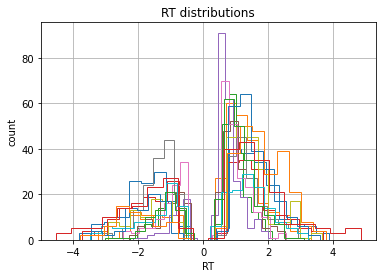

In [9]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# Fit a hierarchical model

In [20]:
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).

# This will tailor an individual hierarchical DDM around your dataset.
m = hddm.HDDM(data, include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = True)
# find a good starting point which helps with the convergence.
m.find_starting_values()
# start drawing 2000 samples and discarding 20 as burn-in (usually you want to have a longer burn-in period)
m.sample(2000, burn=20)

No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 141.0 sec

In [19]:
stats = m.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'a_subj.0', 'a_subj.1'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.97453,0.0904472,1.79808,1.9142,1.97487,2.03438,2.1511,0.0019594
a_std,0.334808,0.0772772,0.222799,0.280524,0.321874,0.3763,0.517447,0.00239345
a_subj.0,2.19935,0.0654665,2.0749,2.15404,2.19961,2.24474,2.32768,0.00222555
a_subj.1,2.11627,0.065044,1.98955,2.07193,2.11598,2.15995,2.24687,0.00218113


Plotting a
Plotting a_std
Plotting v
Plotting t


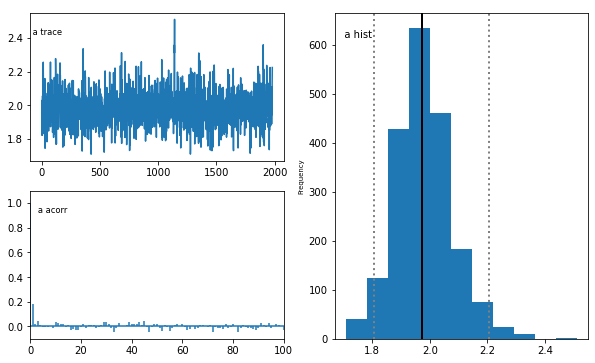

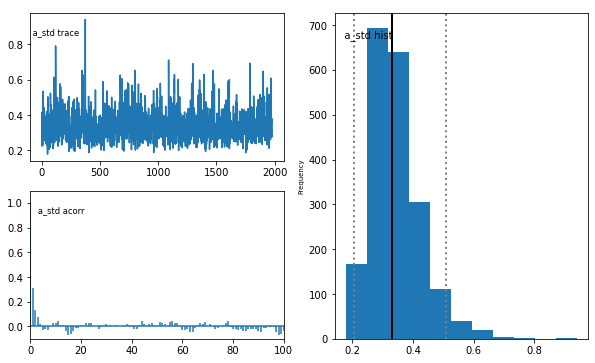

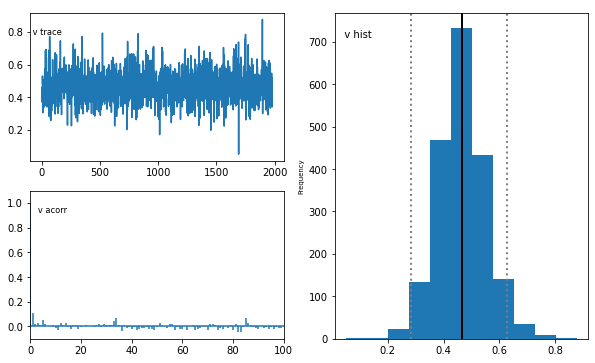

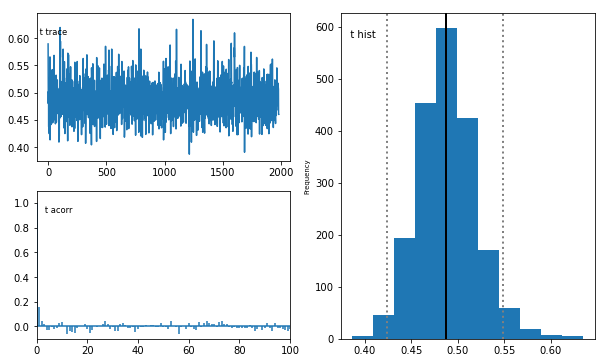

In [21]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])

In [22]:
models = []
for i in range(5):
    m = hddm.HDDM(data, include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = True)
    m.find_starting_values()
    m.sample(2000, burn=500)
    models.append(m)

hddm.analyze.gelman_rubin(models)

No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 2000 of 2000 complete in 133.2 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 2000 of 2000 complete in 137.6 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 2000 of 2000 complete in 162.3 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 2000 of 2000 complete in 137.2 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 2000 of 2000 complete in 127.9 sec

{'a': 1.0008374410344887,
 'a_std': 1.0005912331405884,
 'a_subj.0': 1.0007147538479415,
 'a_subj.1': 0.9999318980955393,
 'a_subj.2': 0.9997525886435946,
 'a_subj.3': 1.0008468145887253,
 'a_subj.4': 0.9997131909759517,
 'a_subj.5': 1.0006796281920665,
 'a_subj.6': 1.0011028118593353,
 'a_subj.7': 1.0009215141550216,
 'a_subj.8': 1.00094786025279,
 'a_subj.9': 1.000351278092734,
 'a_subj.10': 1.0000611246092568,
 'a_subj.11': 1.0013446333560363,
 'a_subj.12': 0.9997605928152864,
 'a_subj.13': 1.001399839202663,
 'v': 1.0007025467204564,
 'v_std': 1.0003421561669883,
 'v_subj.0': 1.002534356093911,
 'v_subj.1': 1.0016847958640323,
 'v_subj.2': 1.0013202746326038,
 'v_subj.3': 1.0035645003074918,
 'v_subj.4': 1.000966416905224,
 'v_subj.5': 1.0009592783724186,
 'v_subj.6': 1.000380188226642,
 'v_subj.7': 1.000154341076259,
 'v_subj.8': 1.0016191015728613,
 'v_subj.9': 1.0008029339820297,
 'v_subj.10': 1.0036858447365313,
 'v_subj.11': 1.0013941538329474,
 'v_subj.12': 1.00199184766593,


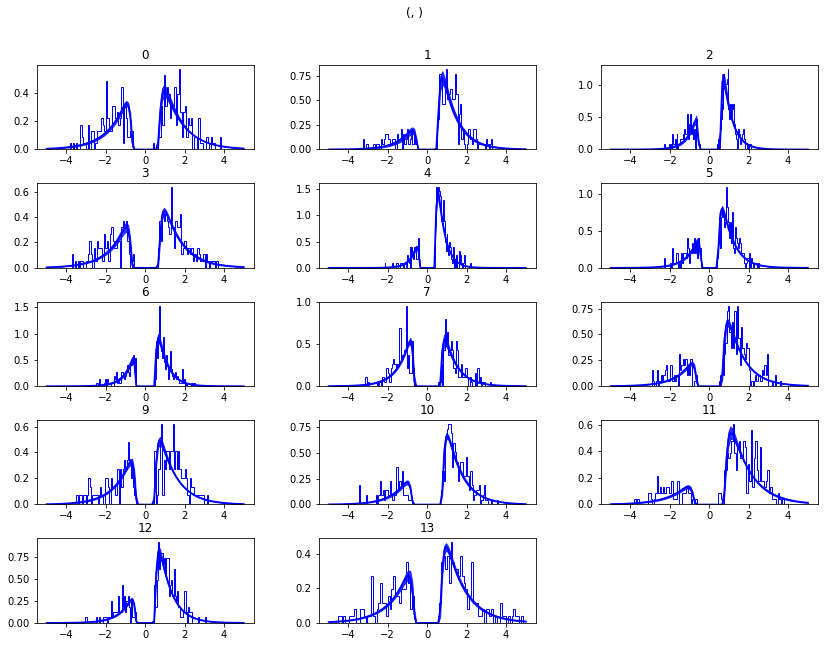

In [23]:
m.plot_posterior_predictive(figsize=(14, 10))

## Model with condition specific drift rates

In [24]:
m_stim = hddm.HDDM(data, include = ['v', 'a', 't', 'z'],
                   informative = True,
                   is_group_model = True,
                   depends_on={'v': 'stim'})
m_stim.find_starting_values()
m_stim.sample(2000, burn=100)

No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 2000 of 2000 complete in 294.3 sec

Text(0.5, 1.0, 'Posterior of drift-rate group means')

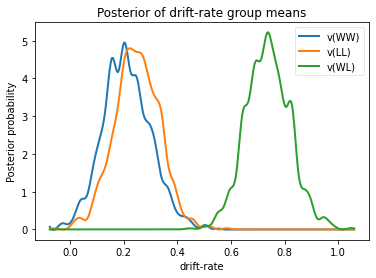

In [25]:
v_WW, v_LL, v_WL = m_stim.nodes_db.node[['v(WW)', 'v(LL)', 'v(WL)']]
hddm.analyze.plot_posterior_nodes([v_WW, v_LL, v_WL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

In [29]:
print("P(WW > LL) = ", (v_WW.trace() > v_LL.trace()).mean())
print("P(LL > WL) = ", (v_LL.trace() > v_WL.trace()).mean())

P(WW > LL) =  0.37
P(LL > WL) =  0.0


In [30]:
print("Lumped model DIC: %f" % m.dic)
print("Stimulus model DIC: %f" % m_stim.dic)

Lumped model DIC: 10970.530765
Stimulus model DIC: 10783.499778


## Model with condition specific drift rates and within subject effects

In [31]:
from patsy import dmatrix
dmatrix("C(stim, Treatment('WL'))", data.head(10))

DesignMatrix with shape (10, 3)
  Intercept  C(stim, Treatment('WL'))[T.LL]  C(stim, Treatment('WL'))[T.WW]
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
  Terms:
    'Intercept' (column 0)
    "C(stim, Treatment('WL'))" (columns 1:3)

In [33]:
m_within_subj = hddm.HDDMRegressor(data, "v ~ C(stim, Treatment('WL'))", 
                                   include = ['v', 'a', 't', 'z'],
                                   informative = True,
                                   is_group_model = True)

No model attribute --> setting up standard HDDM
Set model to ddm


In [34]:
m_within_subj.sample(2000, burn=100)

 [-----------------100%-----------------] 2000 of 2000 complete in 622.3 sec

Text(0.5, 1.0, 'Group mean posteriors of within-subject drift-rate effects.')

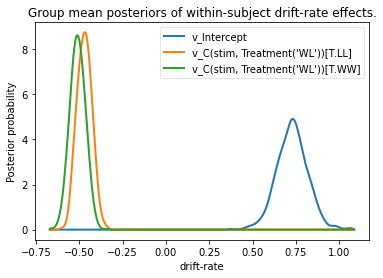

In [35]:
v_WL, v_LL, v_WW = m_within_subj.nodes_db.loc[["v_Intercept",
                                              "v_C(stim, Treatment('WL'))[T.LL]",
                                              "v_C(stim, Treatment('WL'))[T.WW]"], 'node']
hddm.analyze.plot_posterior_nodes([v_WL, v_LL, v_WW])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift-rate effects.')

In [36]:
m_reg = hddm.HDDMRegressor(data[data.dbs == 0],
                           "a ~ theta:C(conf, Treatment('LC'))",
                           depends_on={'v': 'stim'},
                           include = ['v', 'a', 't', 'z'],
                           informative = True,
                           is_group_model = True)

No model attribute --> setting up standard HDDM
Set model to ddm


In [37]:
m_reg.sample(2000, burn=100)

 [-----------------100%-----------------] 2000 of 2000 complete in 907.4 sec

P(a_theta < 0) =  0.049473684210526316


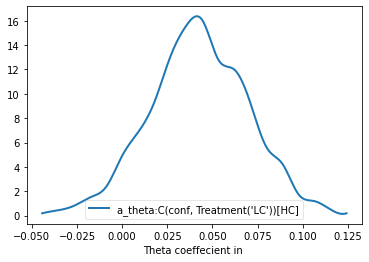

In [38]:
theta = m_reg.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=20)
plt.xlabel('Theta coeffecient in ')
print("P(a_theta < 0) = ", (theta.trace() < 0).mean())

In [41]:
outlier_data, params = hddm.generate.gen_rand_data(params={'a': 2, 't': .4, 'v': .5},
                                                   size=200, n_fast_outliers=10)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
m_no_outlier = hddm.HDDM(outlier_data, p_outlier = 0.0,
                         include = ['v', 'a', 't', 'z'],
                         informative = True,
                         is_group_model = False)
m_no_outlier.sample(2000, burn=50)

No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 2000 of 2000 complete in 8.4 sec

/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:589: UserWarning: Too many nodes. Consider increasing number of columns.
  warnings.warn('Too many nodes. Consider increasing number of columns.')


Text(0, 0.5, 'Probability density')

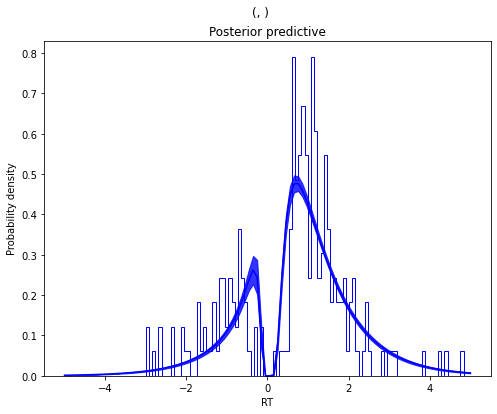

In [43]:
m_no_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')

In [44]:
m_outlier = hddm.HDDM(outlier_data, p_outlier=.05,
                      include = ['v', 'a', 't', 'z'],
                      informative = True,
                      is_group_model = False)
m_outlier.sample(2000, burn=50)

No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 2000 of 2000 complete in 8.7 sec

Text(0, 0.5, 'Probability density')

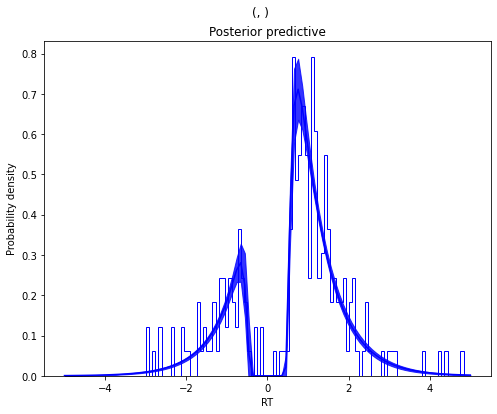

In [45]:
m_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')